## KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as war
war.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/loan_borowwer_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df = df[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','not.fully.paid']]

In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Splitting the data

In [7]:
X = df.drop(columns = 'not.fully.paid')
y = df['not.fully.paid']

In [8]:
print(X.shape, y.shape)

(9578, 8) (9578,)


In [9]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [10]:
print(X_train.shape, X_test.shape)

(7183, 8) (2395, 8)


In [11]:
print(y_train.shape, y_test.shape)

(7183,) (2395,)


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

<AxesSubplot:>

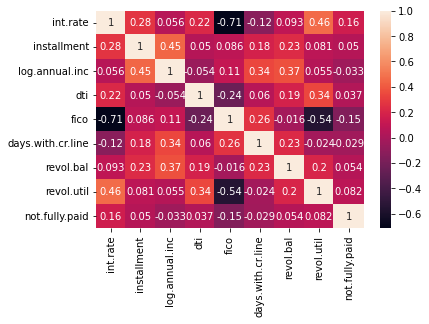

In [19]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='int.rate', ylabel='revol.util'>

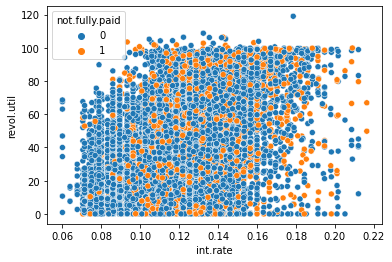

In [20]:
sns.scatterplot(x=df['int.rate'], y=df['revol.util'], hue = df['not.fully.paid'])